In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Cargamos el archivo CSV generado por tu app bancaria
tx_file = pd.read_csv("../__data__/transactions.csv")
u_file = pd.read_csv("../__data__/users.csv")
print("Total enviado por usuario:")
display(tx_file.groupby('from_user_id')['amount'].sum())

Total enviado por usuario:


from_user_id
1    1000
3    2000
5    6000
Name: amount, dtype: int64

In [2]:
print("Total recibido por usuario:")
display(tx_file.groupby('to_user_id')['amount'].sum())

Total recibido por usuario:


to_user_id
1    2000
2    1000
4    6000
Name: amount, dtype: int64

In [3]:
# print('Users with more deposits:')
display(tx_file.value_counts('to_user_id'))

to_user_id
4    2
1    1
2    1
Name: count, dtype: int64

In [4]:
# print('Users with more withdraws:')
display(tx_file.value_counts('from_user_id'))

from_user_id
5    2
1    1
3    1
Name: count, dtype: int64

In [5]:
# print("Table of transactions")
display(tx_file.head())

,from_user_id,to_user_id,amount,timestamp
0,1,2,1000,2025-06-26 15:20:49.513653
1,3,1,2000,2025-06-26 15:20:49.513660
2,5,4,3000,2025-06-26 15:20:49.513664
3,5,4,3000,2025-06-26 15:20:49.513665


In [6]:
# Transaction per day
tx_file["date"] = pd.to_datetime(tx_file['timestamp']).dt.date
display(tx_file.value_counts("date"))

date
2025-06-26    4
Name: count, dtype: int64

In [7]:
# Merge tables
# print(u_file.columns)
txs_with_users = pd.merge(
    tx_file,
    u_file,
    left_on = "from_user_id",
    right_on = "user_id",
    how = "right"
)
display(txs_with_users)

,from_user_id,to_user_id,amount,timestamp,date,user_id,name,balance,country
0,1.0,2.0,1000.0,2025-06-26 15:20:49.513653,2025-06-26,1,Damian,3500,Argentina
1,NaN,NaN,NaN,NaN,NaN,2,Lautaro,7500,Argentina
2,3.0,1.0,2000.0,2025-06-26 15:20:49.513660,2025-06-26,3,Pauline,0,Germany
3,NaN,NaN,NaN,NaN,NaN,4,Lina,11000,Germany
4,5.0,4.0,3000.0,2025-06-26 15:20:49.513664,2025-06-26,5,John,2430,UnitedStates
5,5.0,4.0,3000.0,2025-06-26 15:20:49.513665,2025-06-26,5,John,2430,UnitedStates


In [8]:
# Diagnose merged DF
cl_df = txs_with_users.isna().sum()
display(cl_df)

from_user_id    2
to_user_id      2
amount          2
timestamp       2
date            2
user_id         0
name            0
balance         0
country         0
dtype: int64

In [9]:
# Diagnose merged DF
cl_df = txs_with_users.duplicated().sum()
display(cl_df)

np.int64(0)

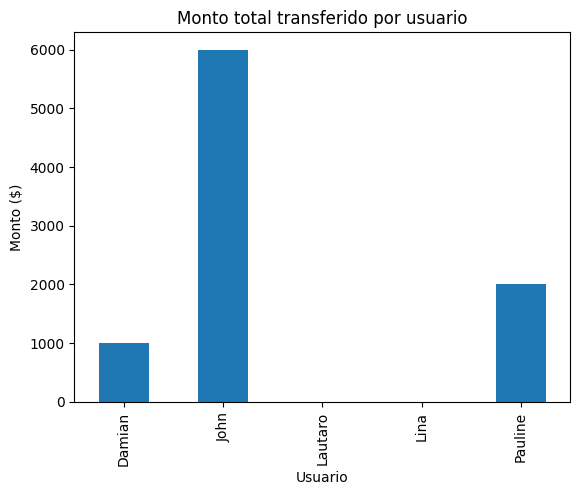

In [10]:
txs_with_users.groupby("name")["amount"].sum().plot.bar()
plt.title("Monto total transferido por usuario")
plt.xlabel("Usuario")
plt.ylabel("Monto ($)")
plt.show()

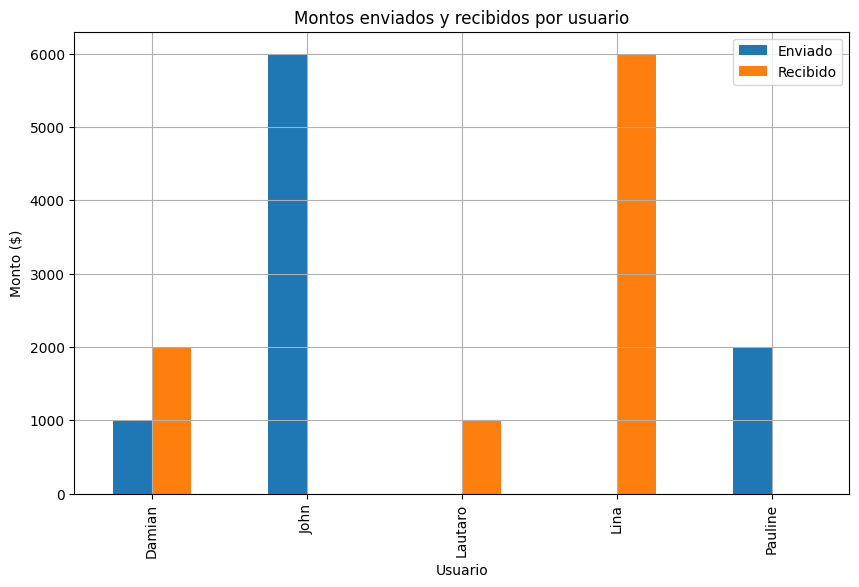

In [11]:
# Agrupamos por nombre y sumamos montos enviados y recibidos
sent = txs_with_users.groupby("name")["amount"].sum()

# Merge para obtener las recepciones
received = txs_with_users.groupby("to_user_id")["amount"].sum()
# Pero acá no tenemos el nombre del receptor, así que hay que mapearlo
id_to_name = txs_with_users.set_index("user_id")["name"].to_dict()
received.index = received.index.map(id_to_name)

# Ahora los juntamos en un nuevo DataFrame
summary_df = pd.DataFrame({
    "Enviado": sent,
    "Recibido": received
})

# Graficamos
summary_df.plot(kind="bar", figsize=(10, 6))
plt.title("Montos enviados y recibidos por usuario")
plt.xlabel("Usuario")
plt.ylabel("Monto ($)")
plt.grid(True)
plt.show()